# Solitões

Importando as bibliotecas

In [ ]:
import matplotlib as mpl
from pylab import cm

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from scipy.optimize import curve_fit
from scipy.optimize import fsolve

Definem-se as funções auxiliares

In [2]:
def read_file(file_path):
    with open(file_path, 'r') as file:
        dados = file.readlines()

    cor1_x  = list()
    cor1_y  = list()

    cor2_x  = list()
    cor2_y  = list()

    tempo   = list()

    for linha in dados[2:]:
        var      = linha.split()

        tempo   += [float(var[0].replace(',','.'))]

        cor1_x  += [float(var[1].replace(',','.'))]
        cor1_y  += [float(var[2].replace(',','.'))]

        cor2_x  += [float(var[3].replace(',','.'))]
        cor2_y  += [float(var[4].replace(',','.').replace('\x00', ''))]
    return tempo, cor1_x, cor1_y, cor2_x, cor2_y

In [3]:
def chi_sq(obs, exp, err):
    soma = 0
    assert(len(obs) == len(exp)) #ERRO DE DIMENSÕES
    for i in range(len(obs)):
        soma += pow((obs[i] - exp[i])/err[i], 2)
    return soma
        

criando um objeto DataFrame, que será exportado para um excel (.csv)

In [4]:
#sheets = pd.DataFrame({'tempo': tempo, 'cor1_x': cor1_x, 'cor1_y': cor1_y, 'cor2_x': cor2_x, 'cor2_y': cor2_y})
#sheets.to_csv('ponham_me_no_google_sheets_pls/h8B10A2.csv')

### Embelezando

In [5]:
mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 22
plt.rcParams['axes.linewidth'] = 2

colors = cm.get_cmap('tab10', 2)

# Dados/h6B20A2.txt

In [6]:
tempo, cor1_x, cor1_y, cor2_x, cor2_y = read_file('Dados/h6B20A2.txt')

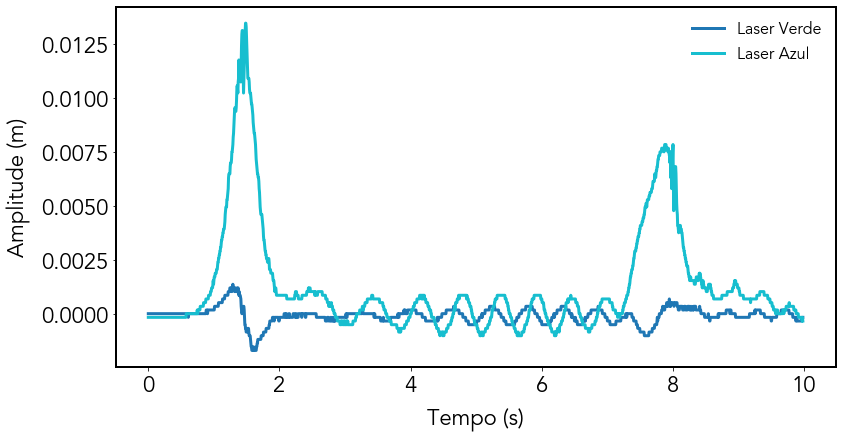

In [7]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_axes([0, 0, 1, 1])

ax.set_xlabel('Tempo (s)', labelpad=10)
ax.set_ylabel('Amplitude (m)', labelpad=10)

plt.plot(tempo, cor1_x, lw = '3', color=colors(0), label="Laser Verde")
plt.plot(tempo, cor1_y, lw = '3', color=colors(1), label="Laser Azul")

#plt.axvline(7.85, linestyle='--')
#plt.axvline(1.45, linestyle='--')
#plt.axhline(0, linestyle='--')

ax.legend(bbox_to_anchor=(1, 1), loc=1, frameon=False, fontsize=16)

Queremos testar o modelo do sinh no primeiro pico

# MODELOS USADOS

## 1 Solitão

In [8]:
def fit_func(t, a, b, c):
    return a*pow(1/np.cosh(b - c*t), 2)

def fit_peak(t, a, b, c):
    return 2*a*c*np.tanh(b - c*t)*fit_func(t, a, b, c)

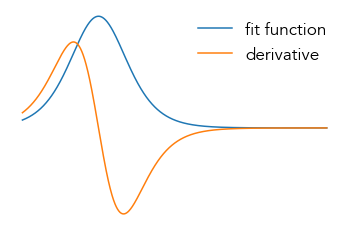

In [9]:
x = np.linspace(-4, 4, 1000)

plt.axis('off') 
plt.plot(x, fit_func(x, 1, -2, 1), label='fit function')
plt.plot(x, fit_peak(x, 1, -2, 1), label='derivative')
plt.legend(bbox_to_anchor=(1, 1), loc=1, frameon=False, fontsize=17)

### Fit do solitão inicial

In [10]:
pars, cov = curve_fit(f=fit_func, xdata=tempo[:395], ydata=cor1_y[:395], p0=[0.0135, -5.8, -4], bounds=(-np.inf, np.inf))
sigmas    = np.sqrt(np.diag(cov))

instante de tempo 1.451739788 segundos


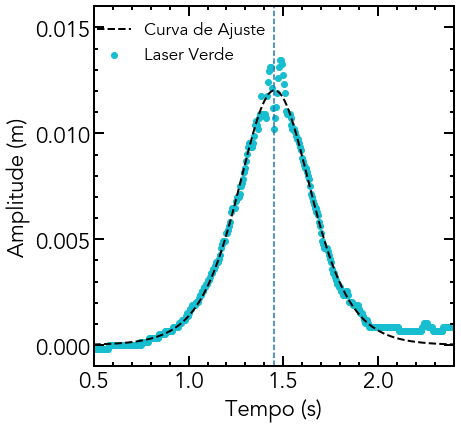

In [11]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_axes([0, 0, 1, 1])

ax.set_xlim(0.5, 2.4)
ax.set_ylim(-0.001, 0.016)

ax.set_xlabel('Tempo (s)')
ax.set_ylabel('Amplitude (m)')

ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=4, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=4, width=2, direction='in', right='on')

ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.5))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.1))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.005))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.001))

#plt.axhline(0, linestyle='--')
ax.scatter(tempo, cor1_y, lw = "1", color=colors(1), label="Laser Verde")

#ARRANJAR FORMAMAIS EFICIENTE DE FAZER ISTO
y = []
for i in tempo:
    y += [fit_func(i, pars[0], pars[1], pars[2])]

ax.plot(tempo, y, linestyle='--', linewidth=2, color='black', label="Curva de Ajuste")

ax.legend(bbox_to_anchor=(0.52, 1), loc=1, frameon=False, fontsize=17)

plt.savefig('h6B20A2_1.png', transparent=False, bbox_inches='tight')

t = tempo[y.index(max(y))]
plt.axvline(t, linestyle='--')
print("instante de tempo " + str(t) + " segundos")

## Estimativa de Erro

Podemos estimar um erro?
talvez assumir como erro as flutuações em torno do 0 antes do aparecimento do solitão? 

In [12]:
for i in cor1_x:
    print(i)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.000170358
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.000170358
0.000170358
0.000170358
0.0
0.0
0.000170358
0.000170358
0.000170358
0.000170358
0.000170358
0.000170358
0.000170358
0.000170358
0.000170358
0.000170358
0.000170358
0.000170358
0.000170358
0.000170358
0.000170358
0.000170358
0.000170358
0.000170358
0.000170358
0.000170358
0.000340715

0.000170358
0.000170358
0.000170358
0.000170358
0.000170358
0.000170358
0.000170358
0.000170358
0.000170358
0.000170358
0.000170358
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.000170358
-0.000170358
-0.000170358
-0.000170358
-0.000170358
-0.000170358
-0.000170358
-0.000170358
-0.000170358
-0.000340715
-0.000340715
-0.000170358
-0.000170358
-0.000340715
-0.000340715
-0.000340715
-0.000340715
-0.000340715
-0.000340715
-0.000340715
-0.000340715
-0.000340715
-0.000340715
-0.000340715
-0.000340715
-0.000340715
-0.000340715
-0.000170358
-0.000170358
-0.000170358
-0.000170358


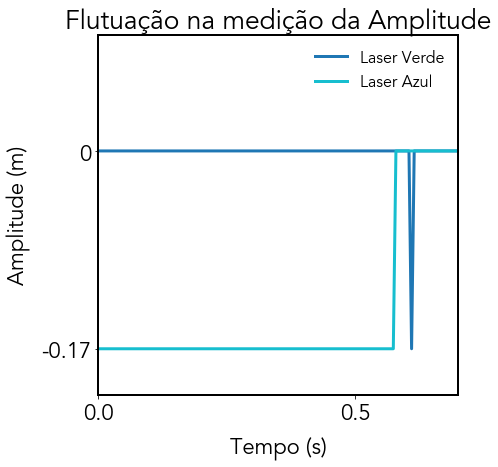

In [13]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_axes([0, 0, 1, 1])

ax.set_xlim(0, 0.7)
ax.set_ylim(-0.00021, 0.0001)

ax.set_xlabel('Tempo (s)', labelpad=10)
ax.set_ylabel('Amplitude (m)', labelpad=10)

ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.5))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.000170358))

plt.plot(tempo, cor1_x, lw = '3', color=colors(0), label="Laser Verde")
plt.plot(tempo, cor1_y, lw = '3', color=colors(1), label="Laser Azul")

plt.title('Flutuação na medição da Amplitude')

ax.set_yticklabels([0, -0.17, 0])

ax.legend(bbox_to_anchor=(1, 1), loc=1, frameon=False, fontsize=16)

Text(0, 0.5, '$\\frac{\\chi^2}{g.l}$=3.193604297866731')

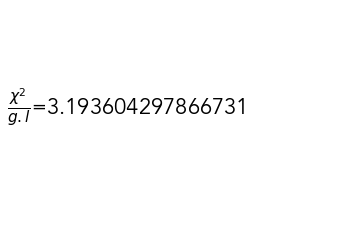

In [14]:
err_value = 0.000170358
errs      = []
for i in range(len(y[:395])):
    errs += [err_value]
plt.axis('off') 
plt.text(0, 0.5, r'$\frac{\chi^2}{g.l}$' + '=' + str(chi_sq(y[:395], cor1_y[:395], errs)/(len(errs) - 1)))

### Fit do solitão refletido

In [15]:
pars_2, cov = curve_fit(f=fit_func, xdata=tempo[1380:1692], ydata=cor1_y[1380:1692], p0=[0.008, -23.4, -3], bounds=(-np.inf, np.inf))
sigmas    = np.sqrt(np.diag(cov))

instante de tempo 7.832288742 segundos


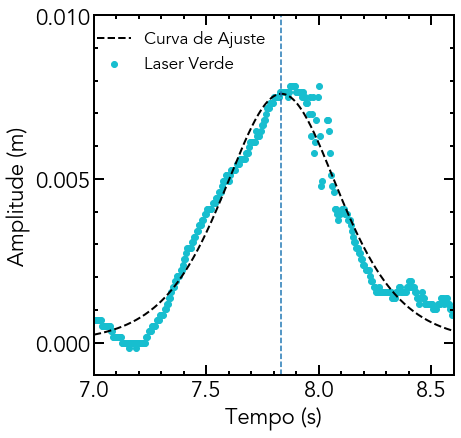

In [16]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_axes([0, 0, 1, 1])

ax.set_xlim(7, 8.6)
ax.set_ylim(-0.001, 0.01)

ax.set_xlabel('Tempo (s)')
ax.set_ylabel('Amplitude (m)')

ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=4, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=4, width=2, direction='in', right='on')

ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.5))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.1))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.005))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.001))

ax.scatter(tempo, np.array(cor1_y), lw = "1", color=colors(1), label="Laser Verde")

#ARRANJAR FORMAMAIS EFICIENTE DE FAZER ISTO
y = []
for i in tempo:
    y += [fit_func(i, pars_2[0], pars_2[1], pars_2[2])]

ax.plot(tempo, y, linestyle='--', linewidth=2, color='black', label="Curva de Ajuste")

ax.legend(bbox_to_anchor=(0.52, 1), loc=1, frameon=False, fontsize=17)

plt.savefig('h6B20A2_2.png', transparent=False, bbox_inches='tight')

t = tempo[y.index(max(y))]
plt.axvline(t, linestyle='--')
print("instante de tempo " + str(t) + " segundos")

Text(0, 0.5, '$\\frac{\\chi^2}{g.l}$=9.142232496245818')

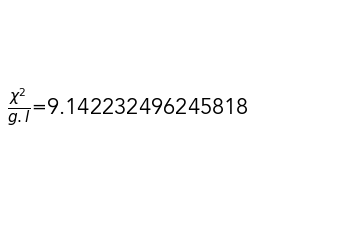

In [17]:
err_value = 0.00017
errs      = []
for i in range(len(y[1380:1692])):
    errs += [err_value]
plt.axis('off') 
plt.text(0, 0.5, r'$\frac{\chi^2}{g.l}$' + '=' + str(chi_sq(y[1380:1692], cor1_y[1380:1692], errs)/(len(errs) - 1)))

## PLOT FINAL

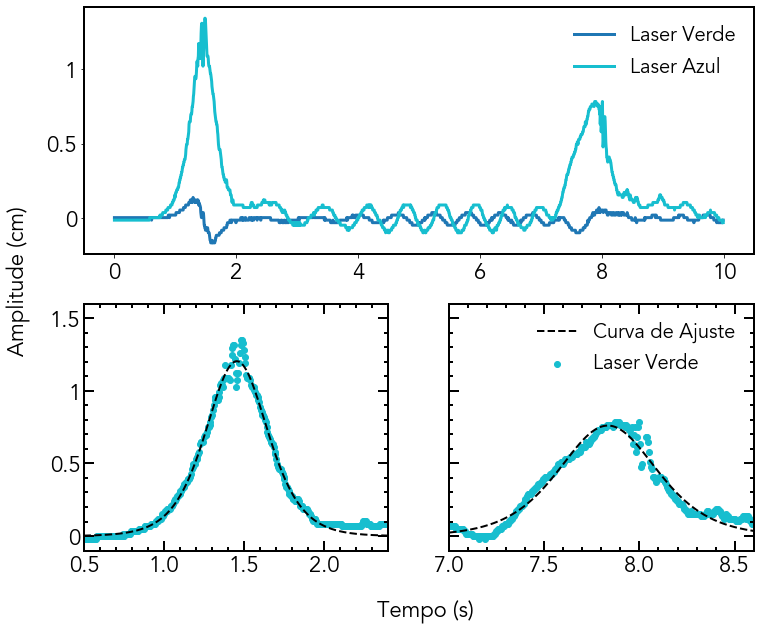

In [18]:
fig = plt.figure(figsize=(12, 10))

ax1= fig.add_subplot(2,2,(1, 2)) # IMAGEM DA EVOLUÇÃO TEMPORAL TOTAL DO SOLITÃO
ax2= fig.add_subplot(2,2,3)      # FIT DO SOLITÃO A SAIR
ax3= fig.add_subplot(2,2,4)      # FIT DO SOLITÃO A VOLTAR

fig.text(0.52, 0.04, 'Tempo (s)', ha='center', va='center', fontsize=22)
fig.text(0.05, 0.5, 'Amplitude (cm)', ha='center', va='center', rotation='vertical', fontsize=22)

#----------------------------------------------------------------------------#
#----------------------------------AX1---------------------------------------#
#----------------------------------------------------------------------------#

ax1.set_yticklabels([0, 0, 0.5, 1])

ax1.plot(tempo, cor1_x, lw = '3', color=colors(0), label="Laser Verde")
ax1.plot(tempo, cor1_y, lw = '3', color=colors(1), label="Laser Azul")

ax1.legend(bbox_to_anchor=(1, 1), loc=1, frameon=False, fontsize=20)

#----------------------------------------------------------------------------#
#----------------------------------AX2---------------------------------------#
#----------------------------------------------------------------------------#

ax2.set_xlim(0.5, 2.4)
ax2.set_ylim(-0.001, 0.016)

ax2.set_yticklabels([0, 0, 0.5, 1, 1.5])

ax2.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax2.xaxis.set_tick_params(which='minor', size=4, width=2, direction='in', top='on')
ax2.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax2.yaxis.set_tick_params(which='minor', size=4, width=2, direction='in', right='on')

ax2.xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.5))
ax2.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.1))
ax2.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.005))
ax2.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.001))

ax2.scatter(tempo, cor1_y, lw = "1", color=colors(1), label="Laser Verde")

#ARRANJAR FORMAMAIS EFICIENTE DE FAZER ISTO
y = []
for i in tempo:
    y += [fit_func(i, pars[0], pars[1], pars[2])]

ax2.plot(tempo, y, linestyle='--', linewidth=2, color='black', label="Curva de Ajuste")

#ax2.legend(bbox_to_anchor=(0.62, 1), loc=1, frameon=False, fontsize=17)

#----------------------------------------------------------------------------#
#----------------------------------AX3---------------------------------------#
#----------------------------------------------------------------------------#

ax3.set_xlim(7, 8.6)
ax3.set_ylim(-0.001, 0.016)

ax3.set_yticklabels([])

ax3.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax3.xaxis.set_tick_params(which='minor', size=4, width=2, direction='in', top='on')
ax3.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax3.yaxis.set_tick_params(which='minor', size=4, width=2, direction='in', right='on')

ax3.xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.5))
ax3.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.1))
ax3.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.005))
ax3.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.001))

ax3.scatter(tempo, np.array(cor1_y), lw = "1", color=colors(1), label="Laser Verde")

#ARRANJAR FORMAMAIS EFICIENTE DE FAZER ISTO
y = []
for i in tempo:
    y += [fit_func(i, pars_2[0], pars_2[1], pars_2[2])]

ax3.plot(tempo, y, linestyle='--', linewidth=2, color='black', label="Curva de Ajuste")

ax3.legend(bbox_to_anchor=(1, 1), loc=1, frameon=False, fontsize=20)

# Dados/h4B40A1.txt

In [ ]:
tempo, cor1_x, cor1_y, cor2_x, cor2_y = read_file('Dados/h4B40A1.txt')

In [ ]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_axes([0, 0, 1, 1])

ax.set_xlabel('Tempo (s)', labelpad=10)
ax.set_ylabel('Amplitude (m)', labelpad=10)

plt.plot(tempo, cor1_x, lw = '3', color=colors(0), label="Laser Verde")
plt.plot(tempo, cor1_y, lw = '3', color=colors(1), label="Laser Azul")

ax.legend(bbox_to_anchor=(0.7, 1), loc=1, frameon=False, fontsize=16)

# Testating as aproximiações iniciais para os parametros dos fits

In [ ]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_axes([0, 0, 1, 1])

ax.set_xlim(7, 8.6)
ax.set_ylim(-0.001, 0.01)

ax.scatter(tempo, cor1_y, lw = "1", color=colors(1))

#ARRANJAR FORMAMAIS EFICIENTE DE FAZER ISTO ----- PROCURAR APROXIMAÇÕES INICIAIS
y = []
for i in tempo:
    y += [fit_func(i, 0.008, -23.4, -3)]
    
ax.plot(tempo, y)